In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv') 
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


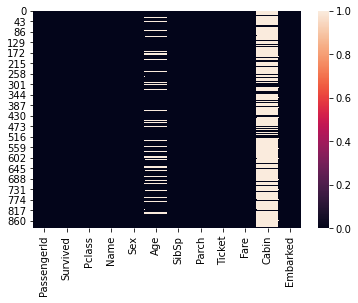

In [5]:
sns.heatmap(train.isnull())

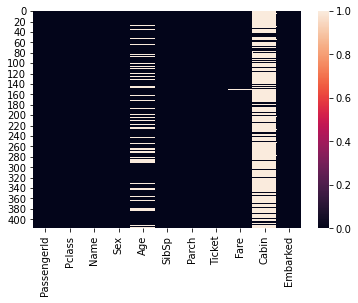

In [6]:
sns.heatmap(test.isnull())

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train['Sex'] = train['Sex'].replace({"male": 0, "female": 1})
test['Sex'] = test['Sex'].replace({"male": 0, "female": 1})

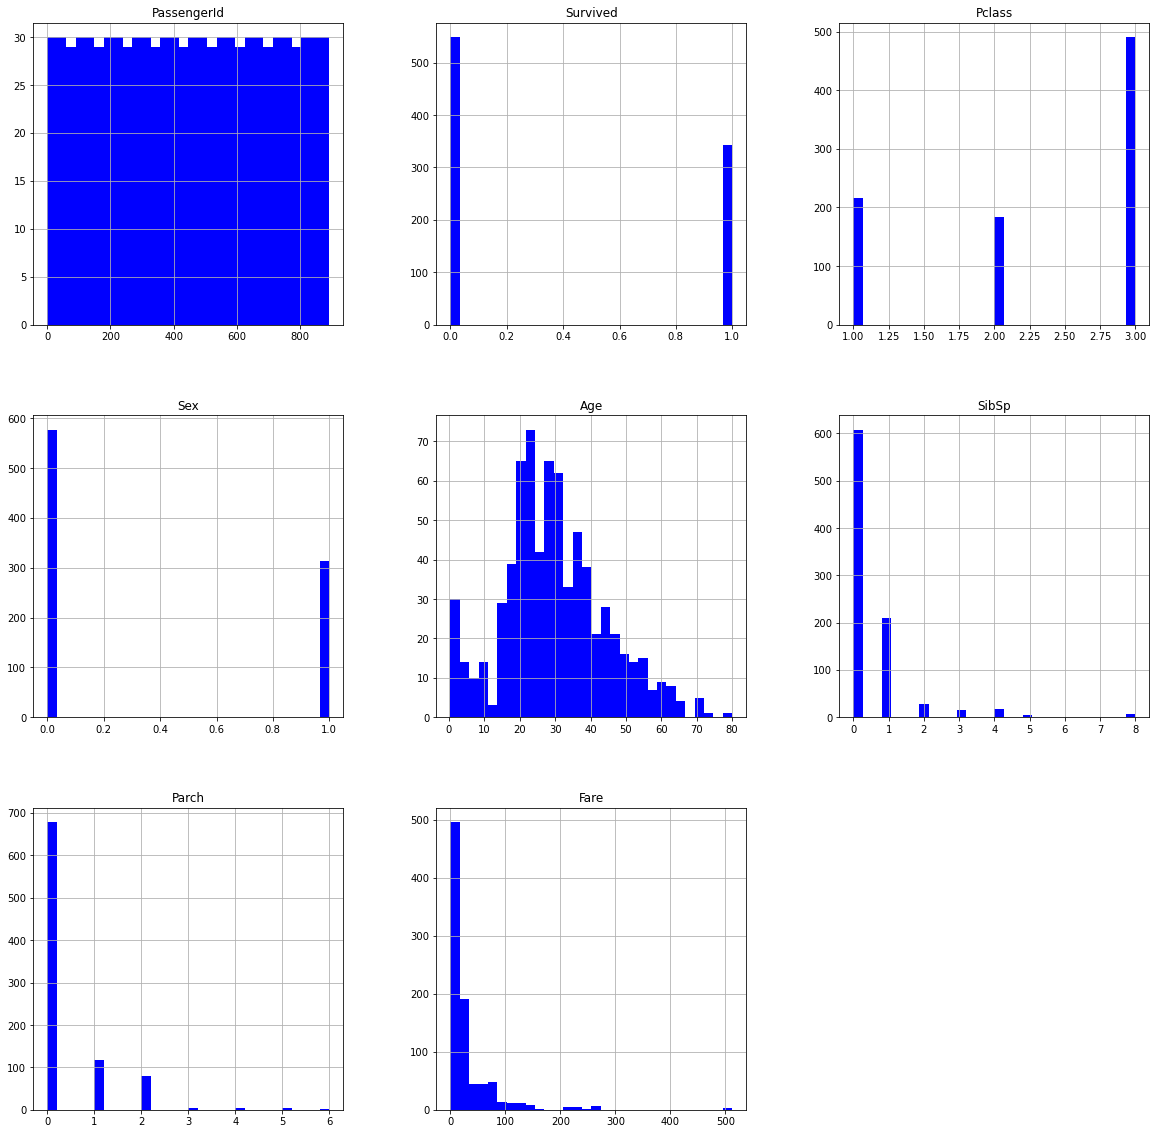

In [10]:
train.hist(bins = 30, figsize=(20,20), color = 'b');

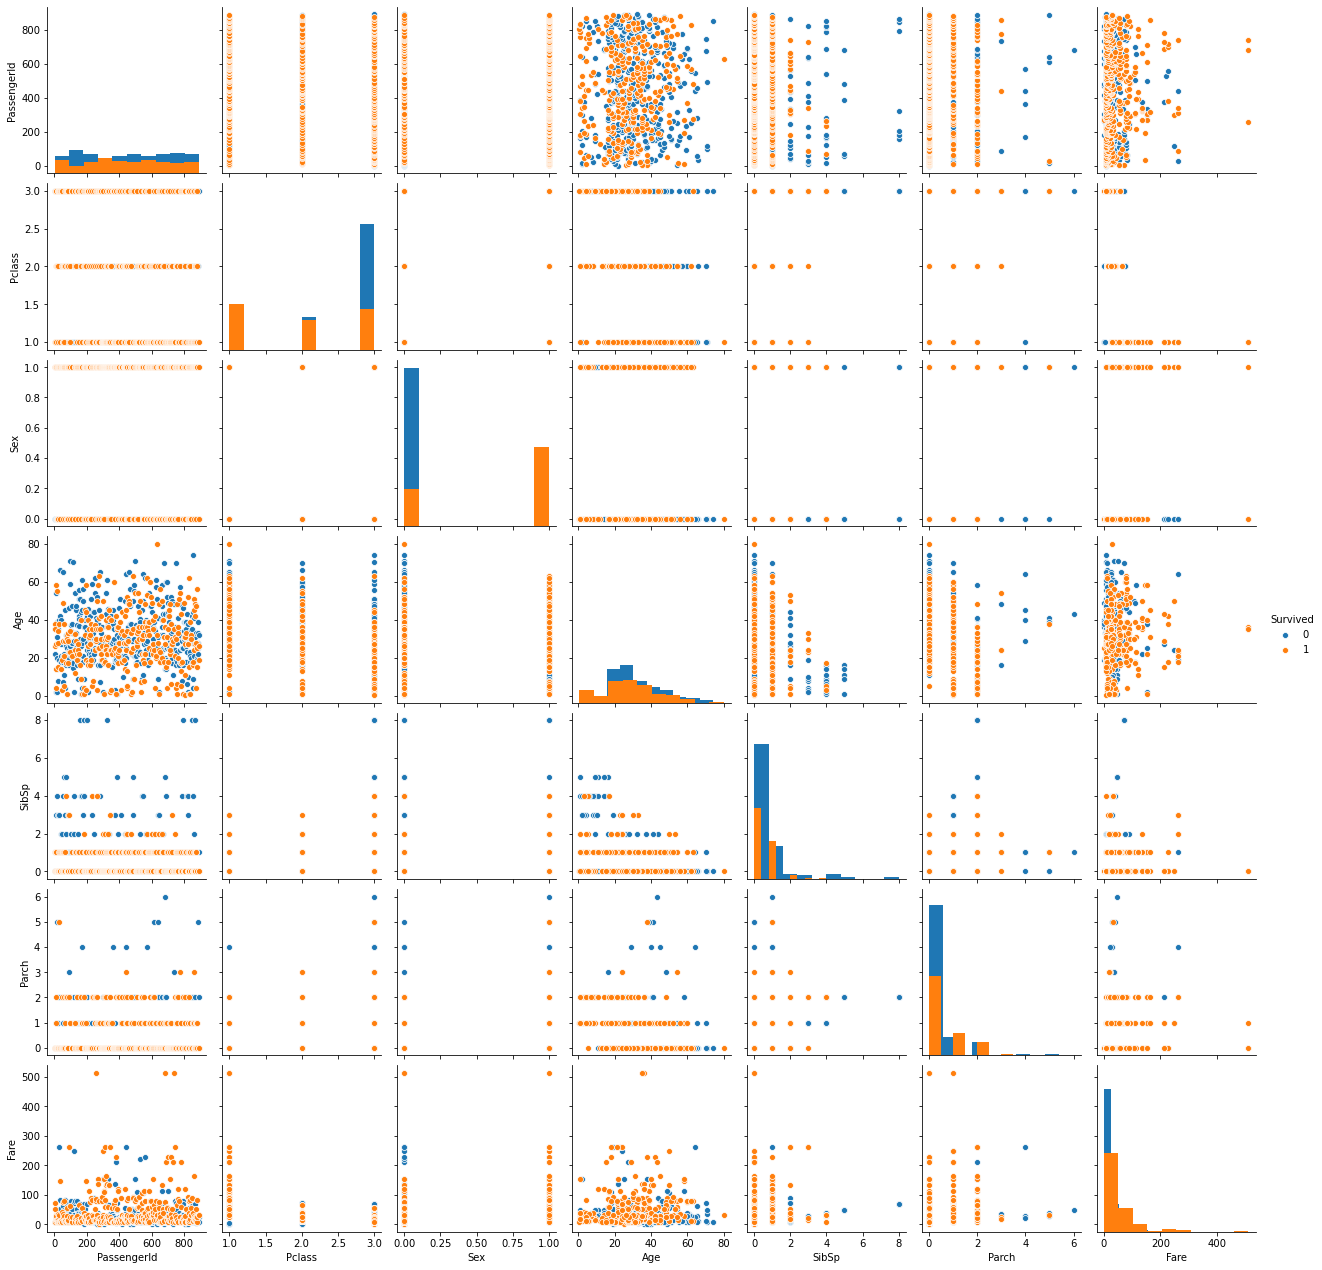

In [11]:
sns.pairplot(train, hue='Survived', diag_kind="hist")

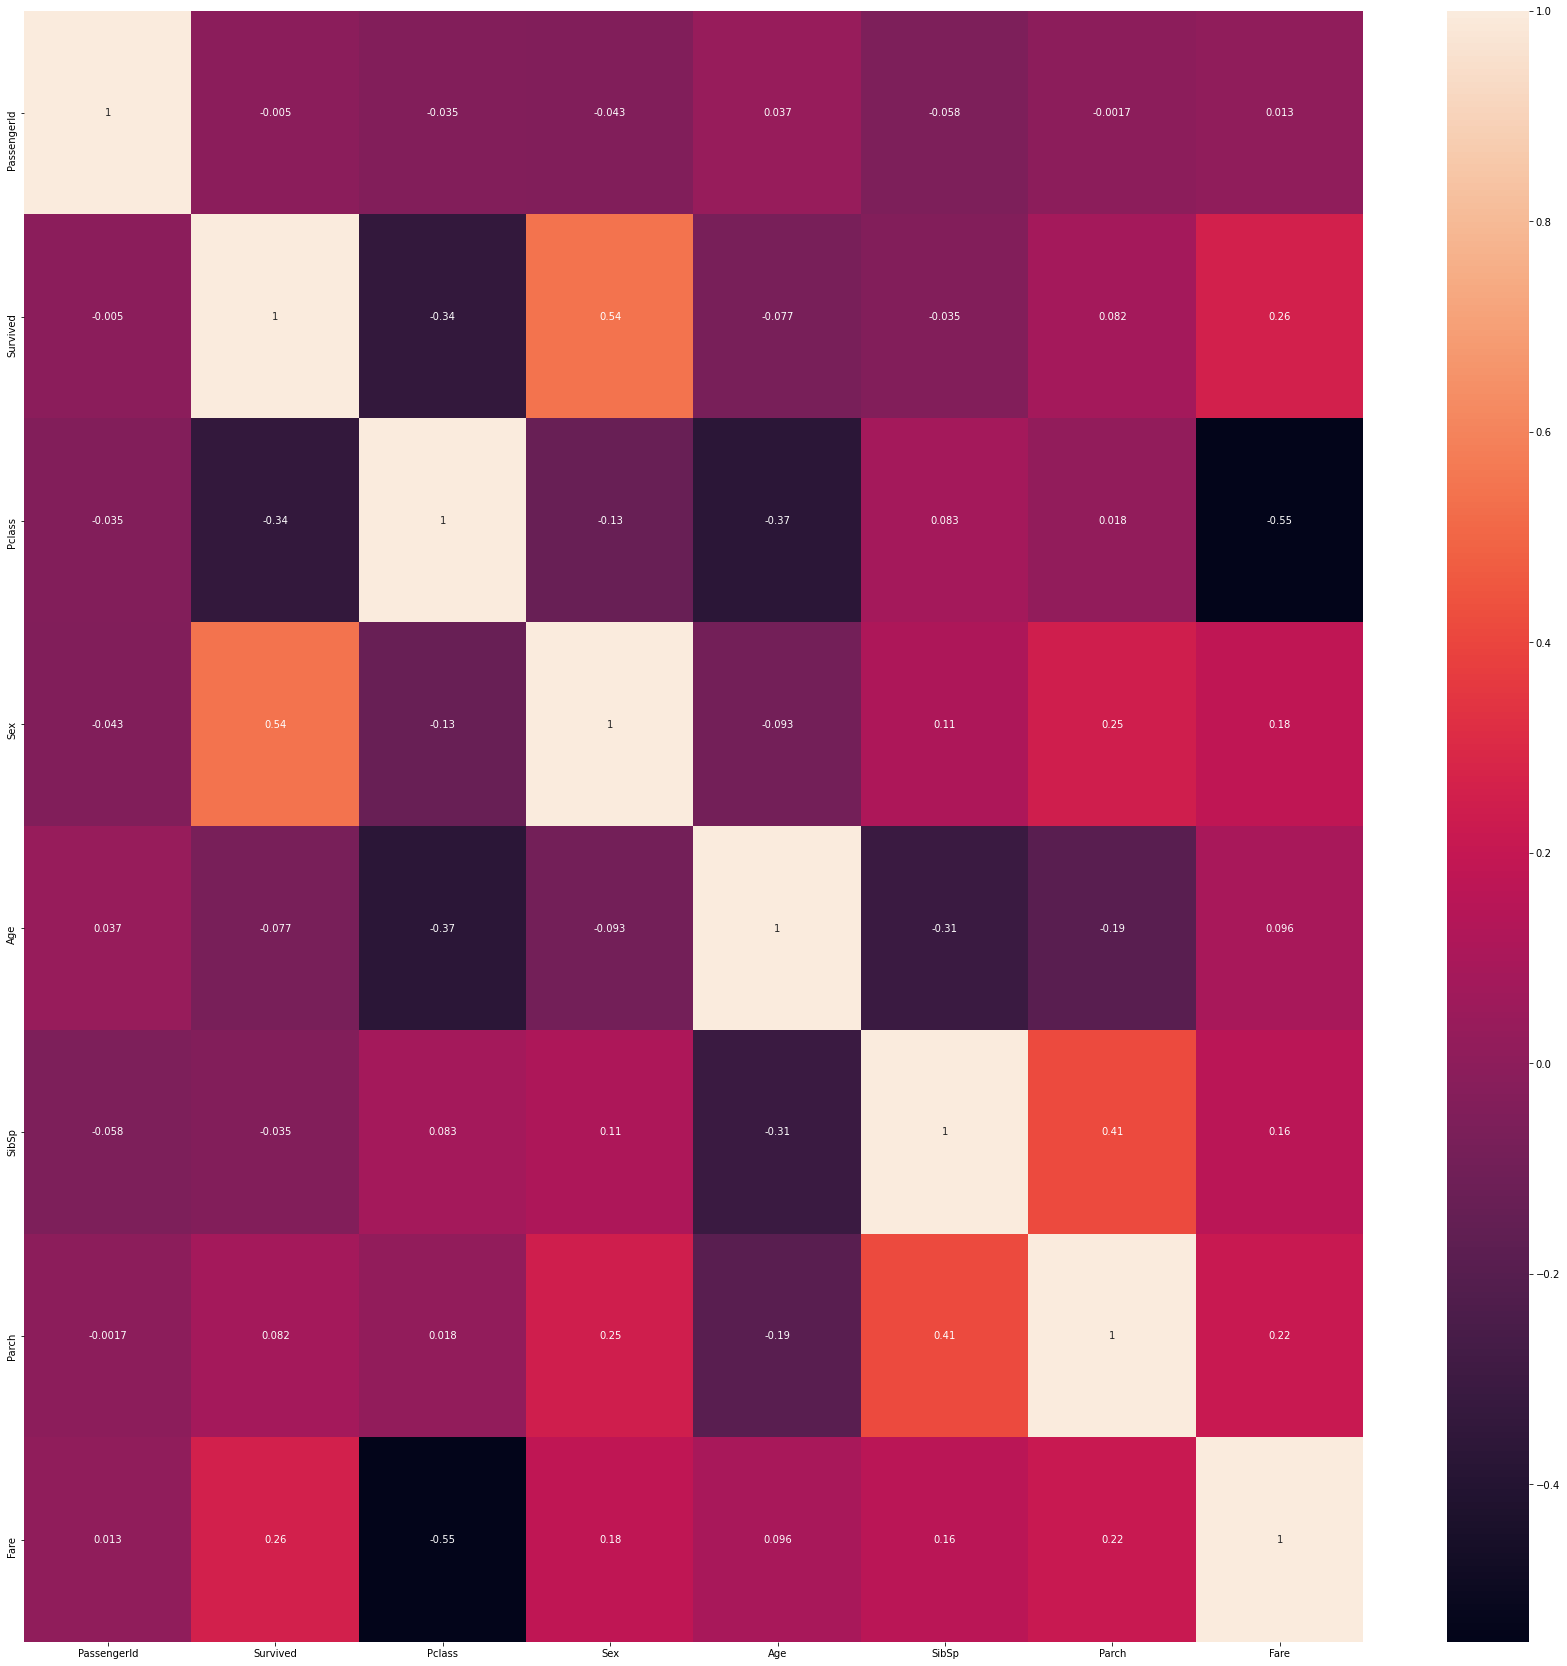

In [12]:
correlations = train.corr()
f, ax = plt.subplots(figsize = (30,30))
sns.heatmap(correlations, annot=True);

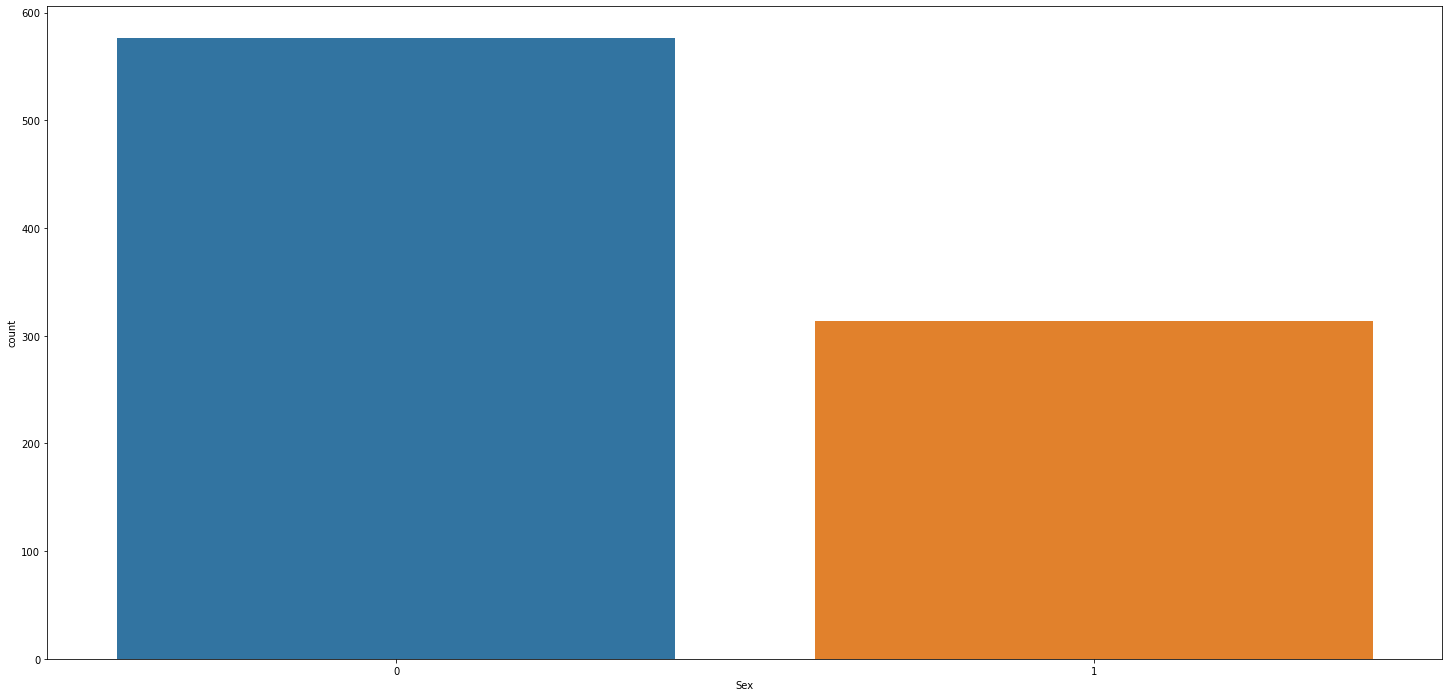

In [13]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Sex', data=train)

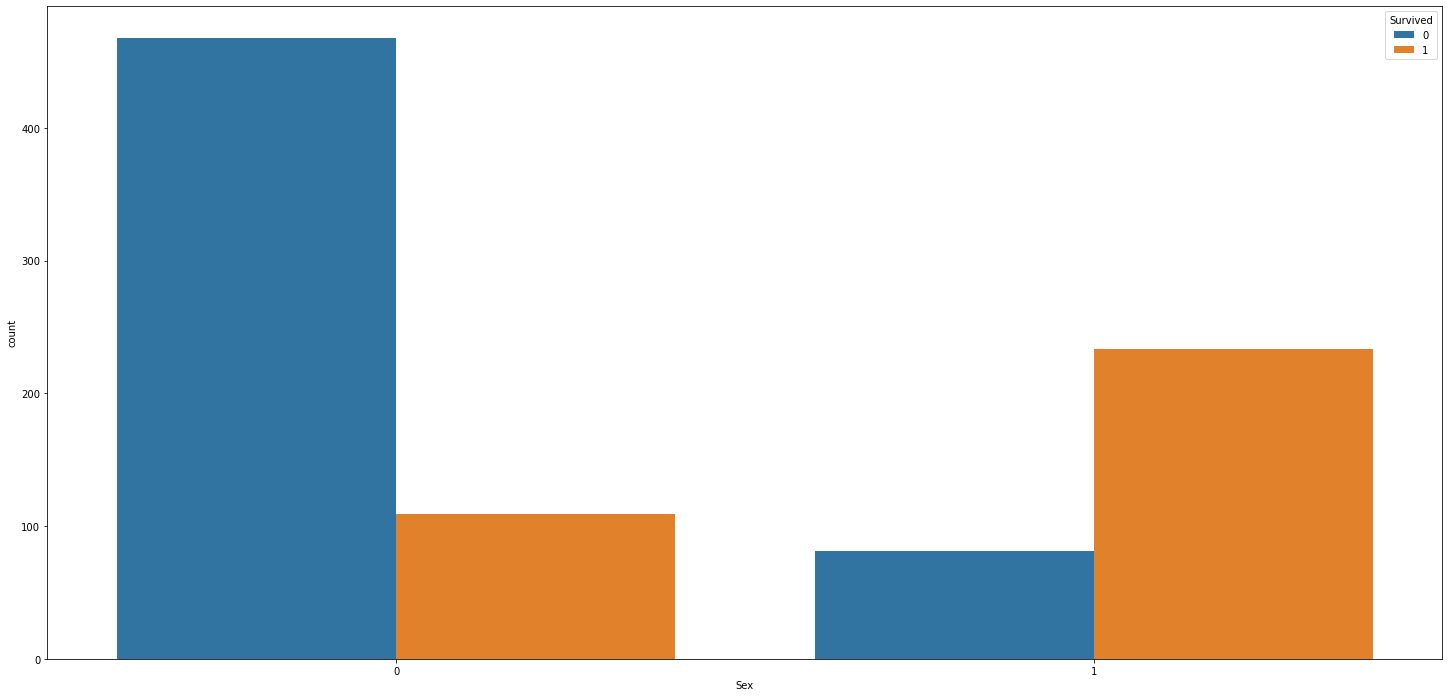

In [14]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Sex', hue = 'Survived', data=train)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",0,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",1,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.7500,NaN,Q


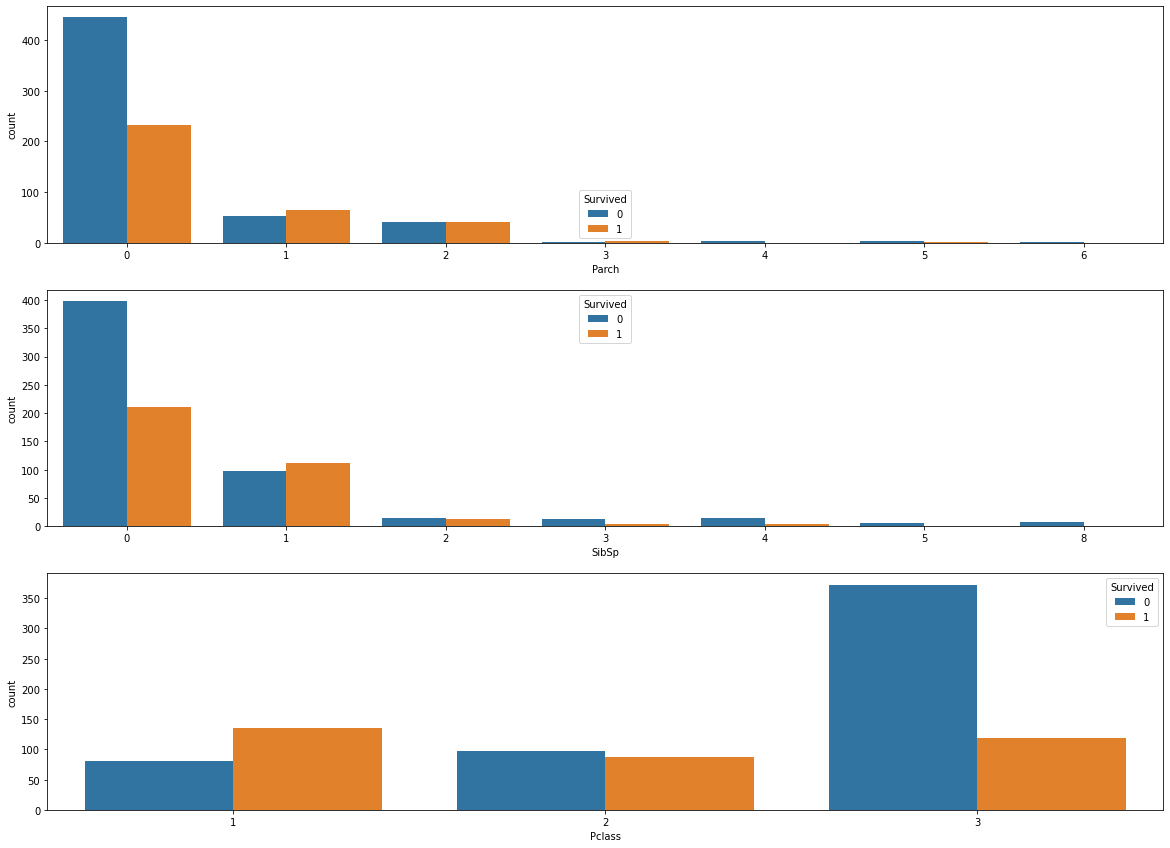

In [17]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Parch', hue = 'Survived', data = train)
plt.subplot(412)
sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
plt.subplot(413)
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

In [18]:
train['Survived'].value_counts(ascending=False)[:5]

0    549
1    342
Name: Survived, dtype: int64

In [19]:
train['Pclass'].value_counts(ascending=False)[:5]

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
train['Sex'].value_counts(ascending=False)[:5]

0    577
1    314
Name: Sex, dtype: int64

In [21]:
train['Age'].value_counts(ascending=False)[:5]

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
28.0    25
21.0    24
25.0    23
36.0    22
29.0    20
32.0    18
27.0    18
35.0    18
26.0    18
16.0    17
31.0    17
20.0    15
33.0    15
23.0    15
34.0    15
39.0    14
17.0    13
42.0    13
40.0    13
45.0    12
38.0    11
50.0    10
2.0     10
4.0     10
47.0     9
44.0     9
48.0     9
54.0     8
9.0      8
1.0      7
51.0     7
52.0     6
14.0     6
3.0      6
49.0     6
41.0     6
37.0     6
15.0     5
43.0     5
58.0     5
11.0     4
62.0     4
60.0     4
8.0      4
56.0     4
5.0      4
Name: Age, dtype: int64

In [22]:
train['SibSp'].value_counts(ascending=False)[:5]

0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64

In [23]:
train['Parch'].value_counts(ascending=False)[:5]

0    678
1    118
2     80
5      5
3      5
Name: Parch, dtype: int64

In [24]:
train[(train['Age'] < 18) & (train['SibSp'] == 0) & (train['Parch'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",1,15.0,0,0,330923,8.0292,NaN,Q
84,85,1,2,"Ilett, Miss. Bertha",1,17.0,0,0,SO/C 14885,10.5000,NaN,S
114,115,0,3,"Attalah, Miss. Malake",1,17.0,0,0,2627,14.4583,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",0,16.0,0,0,7534,9.2167,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",1,16.0,0,0,35851,7.7333,NaN,Q
163,164,0,3,"Calic, Mr. Jovo",0,17.0,0,0,315093,8.6625,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",1,16.0,0,0,367231,7.7500,NaN,Q
220,221,1,3,"Sunderland, Mr. Victor Francis",0,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",0,16.0,0,0,345778,9.5000,NaN,S


In [25]:
test[(test['Age'] < 18) & (test['SibSp'] == 0) & (test['Parch'] == 0)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
60,952,3,"Dika, Mr. Mirko",0,17.0,0,0,349232,7.8958,NaN,S
120,1012,2,"Watt, Miss. Bertha J",1,12.0,0,0,C.A. 33595,15.7500,NaN,S
212,1104,2,"Deacon, Mr. Percy William",0,17.0,0,0,S.O.C. 14879,73.5000,NaN,S
230,1122,2,"Sweet, Mr. George Frederick",0,14.0,0,0,220845,65.0000,NaN,S
269,1161,3,"Pokrnic, Mr. Mate",0,17.0,0,0,315095,8.6625,NaN,S
315,1207,3,"Hagardon, Miss. Kate",1,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q
345,1237,3,"Abelseth, Miss. Karen Marie",1,16.0,0,0,348125,7.6500,NaN,S
403,1295,1,"Carrau, Mr. Jose Pedro",0,17.0,0,0,113059,47.1000,NaN,S


In [26]:
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [27]:
fare = train[(train['Fare'] > 20)]

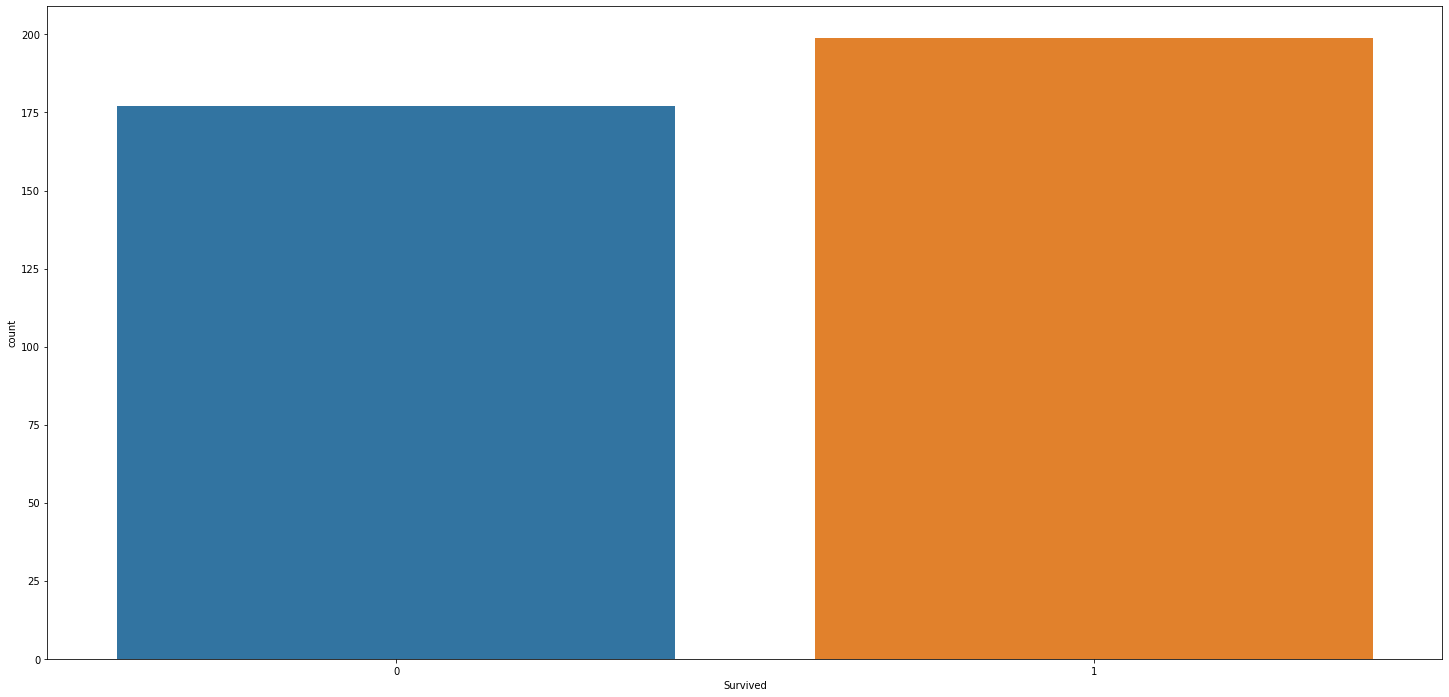

In [28]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Survived', data=fare)

In [29]:
fare = train[(train['Fare'] < 20)]

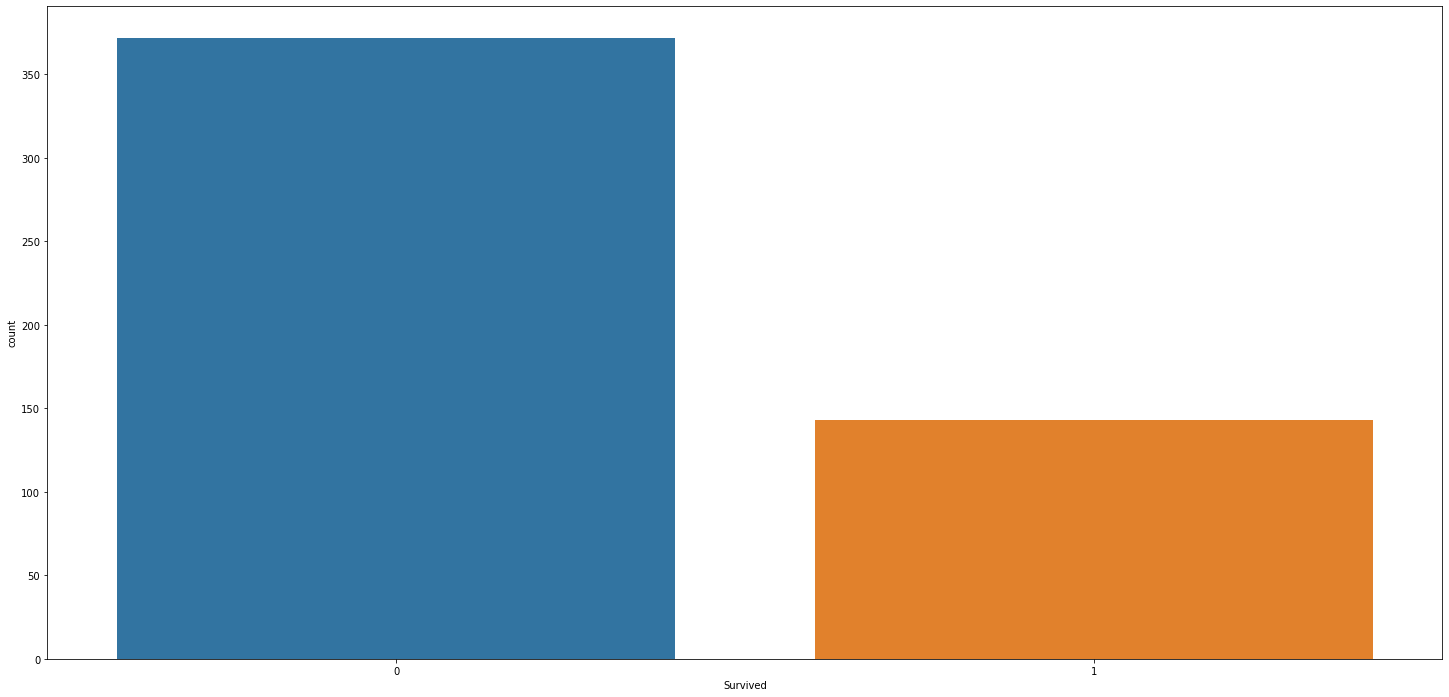

In [30]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Survived', data=fare)

In [31]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

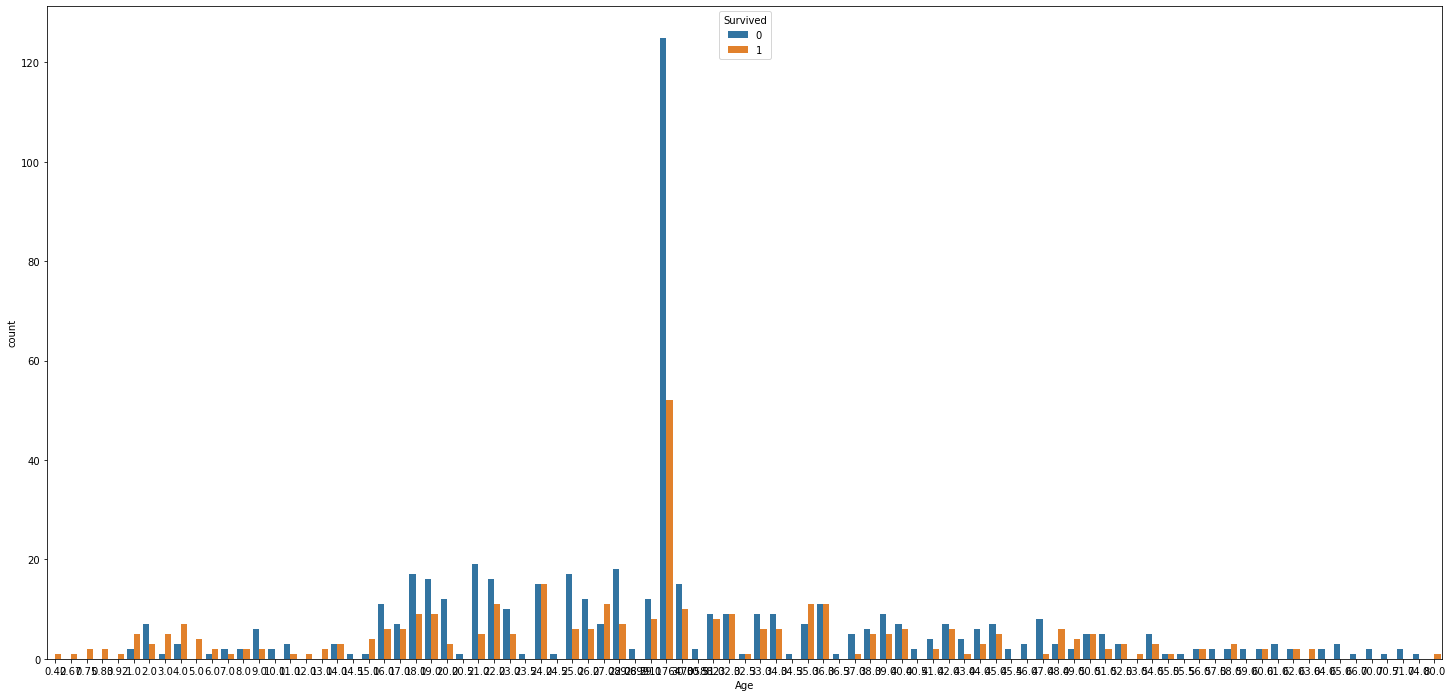

In [32]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Survived', data=train)

In [33]:
train['Embarked'].value_counts(ascending=False)[:5]

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [35]:
train['Embarked'] = train['Embarked'].replace({"S": 0, "C": 1, "Q": 2})
test['Embarked'] = test['Embarked'].replace({"S": 0, "C": 1, "Q": 2})

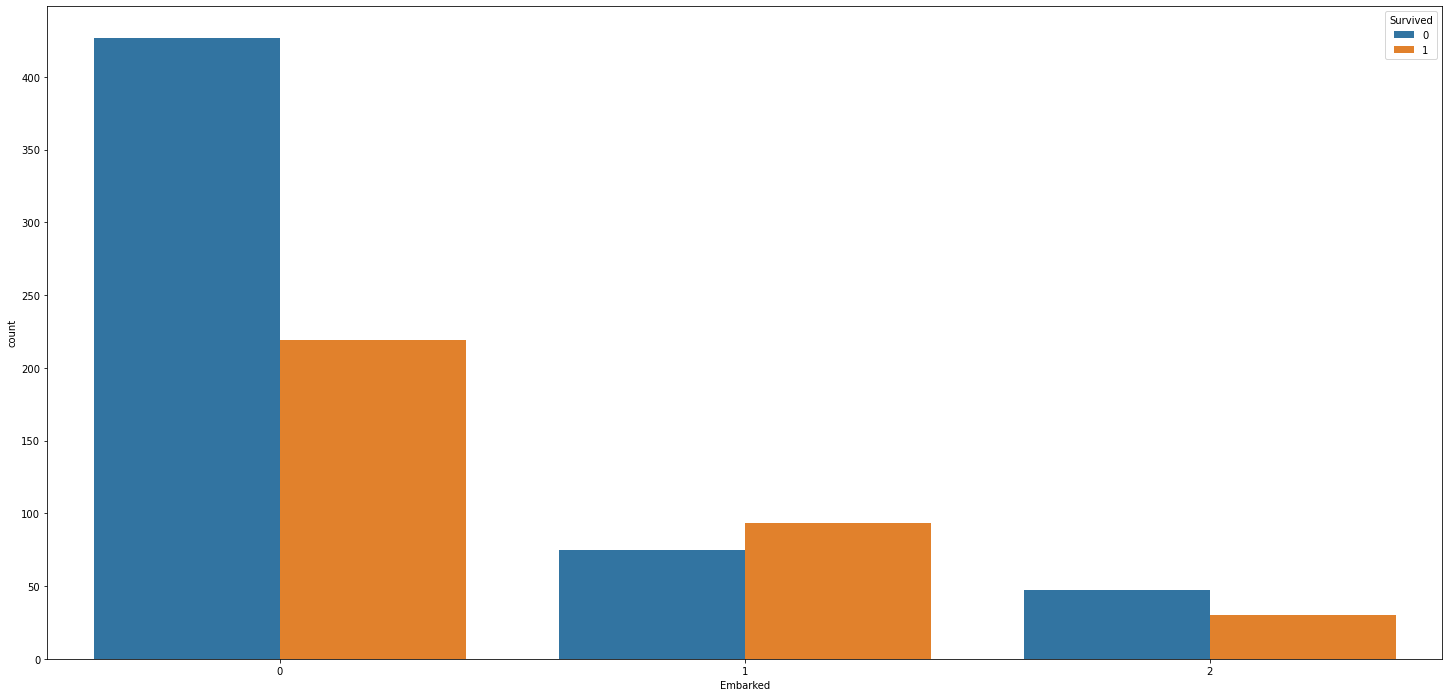

In [36]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Embarked', hue = 'Survived', data=train)

In [37]:
train_data = train.drop(['PassengerId','Name','Cabin','Ticket','Survived','Parch', 'SibSp', ], axis=1)
test_data = test.drop(['PassengerId','Name','Cabin','Ticket','Parch', 'SibSp'], axis=1)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [39]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [40]:
type(train_data)

pandas.core.frame.DataFrame

In [41]:
train_data_hot = train_data[['Pclass', 'Sex', 'Embarked']]
test_data_hot = test_data[['Pclass', 'Sex', 'Embarked']]

In [42]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
train_data_hot = onehotencoder.fit_transform(train_data_hot).toarray()
test_data_hot = onehotencoder.transform(test_data_hot).toarray()

In [43]:
train_data_hot.shape

(891, 8)

In [44]:
train_data_hot = pd.DataFrame(train_data_hot)
test_data_hot = pd.DataFrame(test_data_hot)

In [45]:
train_data_no = train_data[['Age', 'Fare']]
test_data_no = test_data[['Age', 'Fare']]

In [46]:
train_data_full = pd.concat([train_data_no, train_data_hot], axis = 1)
test_data_full = pd.concat([test_data_no, test_data_hot], axis = 1)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_full = scaler.fit_transform(train_data_full)
test_data_full = scaler.transform(test_data_full)

In [48]:
train_data_full

array([[-0.5924806 , -0.50244517, -0.56568542, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [ 0.63878901,  0.78684529,  1.76776695, ..., -1.62380254,
         2.0745051 , -0.30756234],
       [-0.2846632 , -0.48885426, -0.56568542, ...,  0.61583843,
        -0.48204268, -0.30756234],
       ...,
       [ 0.        , -0.17626324, -0.56568542, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [-0.2846632 , -0.04438104,  1.76776695, ..., -1.62380254,
         2.0745051 , -0.30756234],
       [ 0.17706291, -0.49237783, -0.56568542, ..., -1.62380254,
        -0.48204268,  3.25137334]])

In [49]:
target = train['Survived']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_full, target, test_size=0.15, random_state=10)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

def optimize(n_estimators, learning_rate, min_samples_split, min_samples_leaf,
             max_depth, max_features, subsample, params, cv = 5):
  np.random.seed(0)
  gbc = GradientBoostingClassifier(n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  subsample = subsample,
                                  random_state = 0)
  grid_search = GridSearchCV(estimator = gbc, param_grid = params, scoring = 'roc_auc',
                             n_jobs = -1, iid = False, cv = cv)
  grid_search.fit(X_train, y_train)
  results = grid_search.cv_results_
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_
  print(best_params, best_score)
  
  return gbc, best_params, best_score

In [52]:
learning_rate = None
n_estimators = None
max_depth = None
min_samples_split = None
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'learning_rate': (0.1, 0.01), 'n_estimators': range(10, 250, 5), 'max_depth': range(3, 12, 2), 'min_samples_split': range(150, 401, 50)}

In [53]:
gbc, opt_param, score = optimize(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 250, 'n_estimators': 235} 0.8466168082739687


In [54]:
clf = GradientBoostingClassifier(n_estimators= 235,
learning_rate = 0.1,
max_depth = 5,
min_samples_split = 250,
min_samples_leaf = 20,
max_features = 'sqrt',
subsample = 0.8)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_leaf=20, min_samples_split=250,
                           n_estimators=235, subsample=0.8)

In [55]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

accuracy_score(y_test, pred)

0.8805970149253731

In [56]:
prediction = clf.predict(test_data_full)

In [57]:
prediction[0]

0

In [58]:
submission = pd.DataFrame()
submission['PassengerId'] = gender_submission['PassengerId']
submission['Survived'] = prediction.astype('int64')

In [59]:
submission.to_csv('submission0.csv', index=False)